In [1]:
#Simple Iris Flower Prediction using KNN 

In [2]:
#Import basic libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
#Read the data set 
iris = pd.read_csv("C:/Users/neant/OneDrive/Desktop/Projects/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Id column is not needed. Dropping it 
iris = iris.drop("Id",axis =1)

In [5]:
#EDA 
#Exploring the target variable Species first 
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
#get a correlation matrix
iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

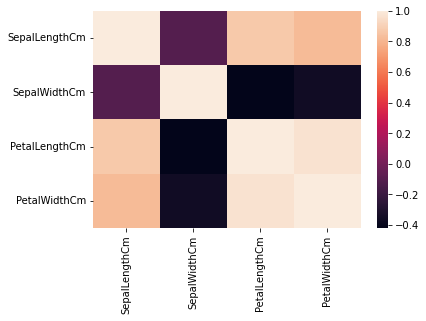

In [7]:
import seaborn as sns 
sns.heatmap(iris.corr())

In [8]:
#All features seem to be correlated, not removing any feature 

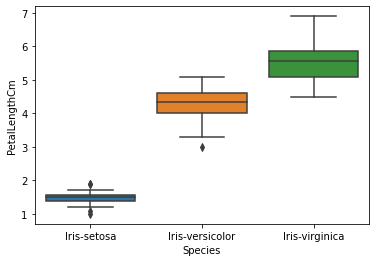

In [12]:
#more visualizations 
sns.boxplot(x="Species", y ="PetalLengthCm", data = iris)
plt.show ()

C:\Users\neant\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


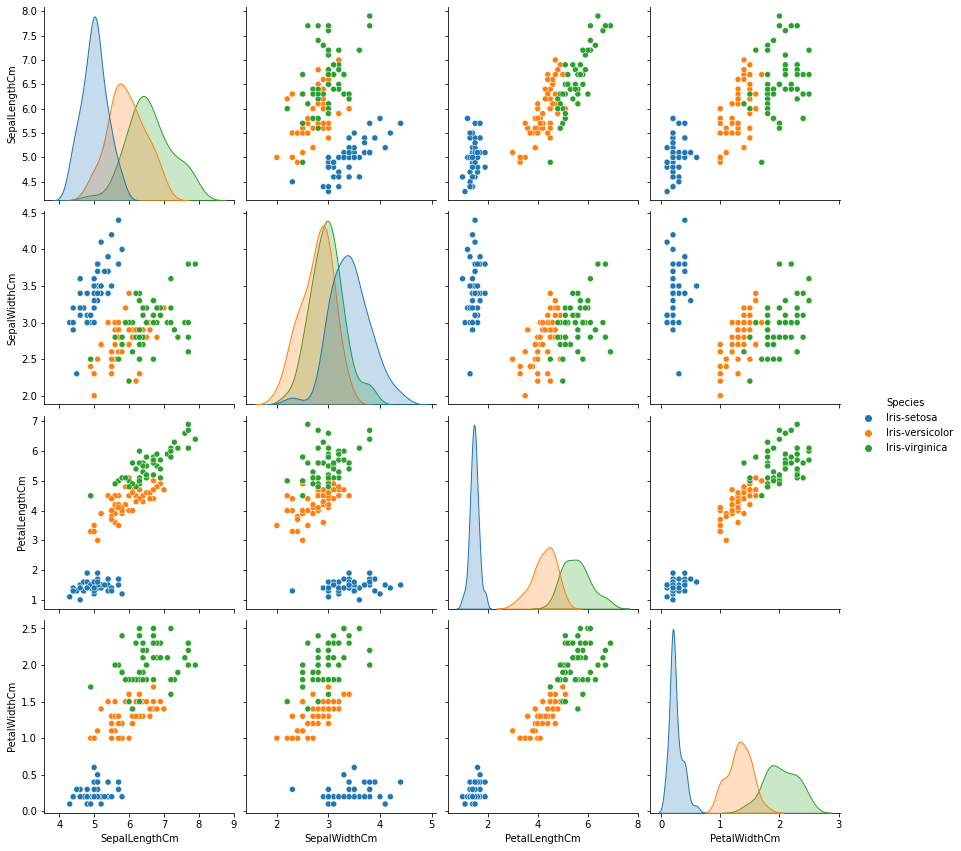

In [17]:
sns.pairplot(hue = 'Species', size = 3, data = iris)
plt.show()

C:\Users\neant\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


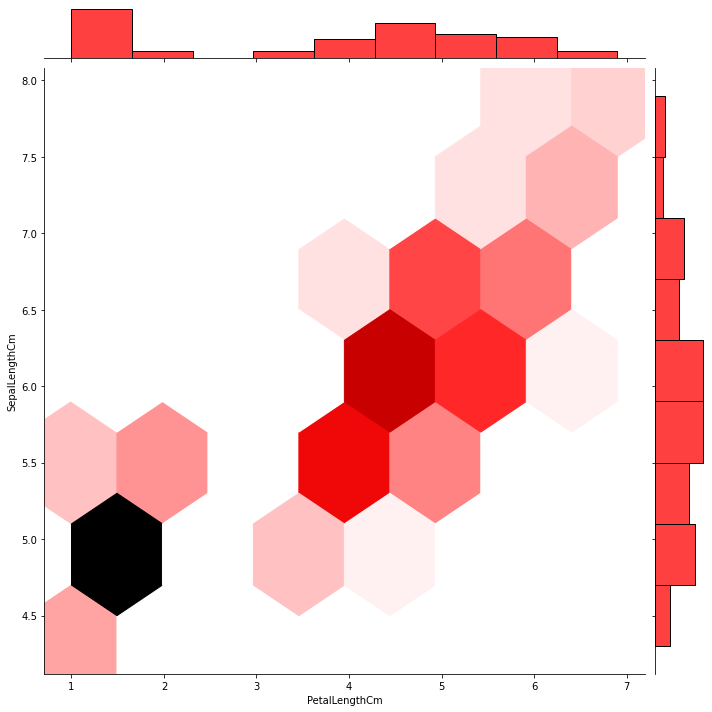

In [29]:
sns.jointplot(x='PetalLengthCm',y='SepalLengthCm', data = iris, size = 10, ratio = 10, kind = 'hex', color = 'red')
plt.show()

In [30]:
#Beginning the model Implementation. First Seaparating the target and variables 
X = iris.drop('Species',axis =1).values
y= iris['Species'].values

In [32]:
#splitting the data into test and training sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [33]:
#creating empty arrays for the accuracy scores 
from sklearn.neighbors import KNeighborsClassifier
train_accuracy = {}
test_accuracy = {} 
neighbors = np.arange(1,20)
for n in neighbors: 
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    train_accuracy[n] = knn.score(X_train,y_train)
    test_accuracy[n] = knn.score(X_test,y_test)

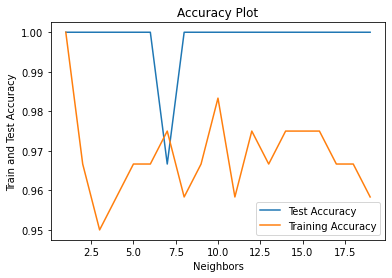

In [39]:
plt.plot(neighbors,test_accuracy.values(),label="Test Accuracy")
plt.plot(neighbors,train_accuracy.values(), label = "Training Accuracy")
plt.xlabel("Neighbors")
plt.ylabel("Train and Test Accuracy")
plt.title("Accuracy Plot")
plt.legend()
plt.show()

In [40]:
#Overfitting occurs after 8 Neighbours
#The optimal number of neighbours to get highest accuracy is 8 